文章见于：[美食图谱复现指南之依存句法分析](https://zhuanlan.zhihu.com/p/56202703)

安装 pyltp  
windows下直接`pip install pyltp`安装可能会出现`Microsoft Visual C++`等相关错误，所以建议参考：《[哈工大自然语言处理ltp在windows10下的安装使用](http://mlln.cn/2018/01/31/pyltp%E5%9C%A8windows%E4%B8%8B%E7%9A%84%E7%BC%96%E8%AF%91%E5%AE%89%E8%A3%85/)》一文的方案二，亲测可行。
![](https://upload-images.jianshu.io/upload_images/7145358-0c0278061fbc0943.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

pyltp的入门介绍：官方文档[使用 pyltp](https://pyltp.readthedocs.io/zh_CN/latest/api.html)一文就够了。
> pyltp 是 [LTP](https://github.com/HIT-SCIR/ltp) 的 Python 封装，提供了分词，词性标注，命名实体识别，依存句法分析，语义角色标注的功能。
  
## 相关文章  
[使用语言云分析微博用户饮食习惯](http://www.ltp-cloud.com/blog/2014-03-24-analysis-weibo-user-diet-using-ltpcloud-api)  
[LTP 依存句法关系](https://ltp.readthedocs.io/zh_CN/latest/appendix.html#id5)  

[twjiang/fact_triple_extraction](https://github.com/twjiang/fact_triple_extraction/blob/master/fact_triple_extraction.py)    
[DJH-pyltp/triple_of_relation](https://github.com/jasonhavenD/DJH-pyltp/blob/master/triple_of_relation/re.py)
[ltp︱基于ltp的无监督信息抽取模块（事件抽取/评论观点抽取） - 悟乙己](https://zhuanlan.zhihu.com/p/44890664) 
- [mattzheng/LtpExtraction](https://github.com/mattzheng/LtpExtraction)

[liuhuanyong/CausalityEventExtraction 基于因果关系知识库的因果事件图谱实验项目](https://github.com/liuhuanyong/CausalityEventExtraction)  
[网络新闻评论观点挖掘系统实现](https://blog.csdn.net/androidlushangderen/article/details/46291821)

[依存句法分析结果的输出怎么看](https://blog.csdn.net/GBA_Eagle/article/details/82189689)
![](https://upload-images.jianshu.io/upload_images/7145358-94e8f736f22ef82b.jpg?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

[一个非常好的依存句法可视化工具](https://zhuanlan.zhihu.com/p/27338311)   
- [南京大学 - Dependency Viewer](http://nlp.nju.edu.cn/tanggc/tools/DependencyViewer.html)

[HanLP 1.1.2 文档 - 依存句法解析](http://hanlp.linrunsoft.com/doc/_build/html/dependency_parser.html)
[利用python调用hanlp实现依存句法可视化](https://blog.csdn.net/lushilun/article/details/82843765)

- [HanLP 官网演示](http://hanlp.com/)
- https://github.com/hankcs/pyhanlp
- https://github.com/hankcs/HanLP 
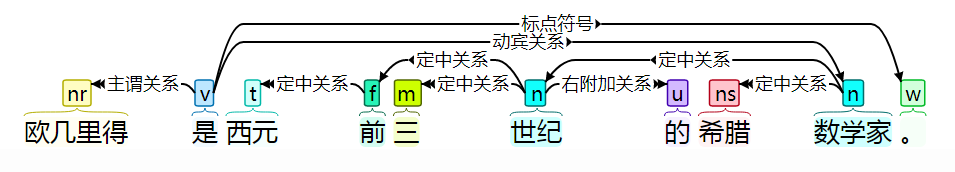

[StandfordParser：入门篇](https://www.cnblogs.com/stardjyeah/p/4574164.html)

[使用语言云分析微博用户饮食习惯](http://www.ltp-cloud.com/blog/2014-03-24-analysis-weibo-user-diet-using-ltpcloud-api)

Step 3 用语言云处理文本
有了微博数据后就可以利用语言工具处理微博文本了。

在微博饮食分析中，我们需要用到分词、词性标注和依存句法分析。当研究一条微博判断是否发生饮食行为时，我们可以对微博内容的分词结果用这样一条规则：用含词语“吃”+与“吃”相关的句法关系为VOB（动宾关系）+“吃”的宾语为名词这三个条件来过滤。如果符合这个有三个条件的规则，则可以判定为发生了饮食行为，且提取出来的“吃”的宾语就是饮食行为涉及的食品。

比如对“我刚吃了一块巧克力”这句话，用语言云进行分析可得结果：
![](http://www.ltp-cloud.com/static/img/blog/ltp-cloud-analysis-result2.png)

这就符合：含“吃”；与吃相关的句法关系为VOB关系，“吃”的宾语“巧克力”词性为名词，我们就可以说这条微博描述了饮食行为，且所涉及的食品是“巧克力”。
而对前文提到的例子“今天我去电影院看了浓情巧克力。”的分析结果则为：
![](http://www.ltp-cloud.com/static/img/blog/ltp-cloud-analysis-result2.png)

明显不符合我们设定的规则。也就是说，我们从语义上过滤掉了这种噪声。
再比如像“我吃了个巧克力味冰淇淋。”这个句子，在传统的基于关键词匹配的方法中，会导致“巧克力”和“冰淇淋”各算一次，但实际上谈到的是吃冰淇淋，并不是吃巧克力。通过语言云分析，可以得到结果：
![](http://www.ltp-cloud.com/static/img/blog/ltp-cloud-analysis-result3.png)

用我们设定的规则就能很容易地得到这句话谈到的真实食品“冰淇淋”。

In [1]:
import os
from pyltp import Segmentor
LTP_DATA_DIR = '/path/to/your/ltp_data' # ltp模型目录的路径

# 加载分词模型
cws_model_path = os.path.join(LTP_DATA_DIR, 'cws.model')
segmentor = Segmentor()
segmentor.load(cws_model_path)

# 加载词性标注模型
from pyltp import Postagger
pos_model_path = os.path.join(LTP_DATA_DIR, 'pos.model')
postagger = Postagger()
postagger.load(pos_model_path)

# 加载依存句法分析模型
from pyltp import Parser
par_model_path = os.path.join(LTP_DATA_DIR, 'parser.model')
parser = Parser()
parser.load(par_model_path)

In [2]:
def extract_food(sentence):
    words = segmentor.segment(sentence)
    postags = postagger.postag(words)
    for word, postag in zip(words, postags):
        print(word + '/'+ postag, end=' ')
    netags = recognizer.recognize(words, postags)
    arcs = parser.parse(words, postags)
       
    # 例句：我 刚 吃 了 一 块 巧克力 。
        
    # 提取依存父节点id
    # 3, 3, 0, 3, 6, 7, 3, 3
    rely_id = [arc.head for arc in arcs]
    #print(rely_id)

    # 提取依存关系
    # ['SBV', 'ADV', 'HED', 'RAD', 'ATT', 'ATT', 'VOB', 'WP']
    relation = [arc.relation for arc in arcs]
    #print(relation)

    # 匹配依存父节点词语
    # ['吃', '吃', 'Root', '吃', '块', '巧克力', '吃', '吃']
    heads = ['Root' if id==0 else words[id-1] for id in rely_id]
    #print(heads)
    
    print("\n")
    for i in range(len(words)):
        if postags[i] == 'n' and heads[i] == '吃' and relation[i] == 'VOB':
            print("找到了一种食物：" + words[i])
    print("=" * 30)    

In [3]:
sentences = ['我刚吃了一块巧克力。', '今天我去电影院看了浓情巧克力。', '我吃了个巧克力味冰淇淋。']
for sent in sentences:
    extract_food(sent)

我/r 刚/d 吃/v 了/u 一/m 块/q 巧克力/n 。/wp 

找到了一种食物：巧克力
今天/nt 我/r 去/v 电影院/n 看/v 了/u 浓/a 情/n 巧克力/n 。/wp 

我/r 吃/v 了/u 个/q 巧克力/n 味/n 冰淇淋/n 。/wp 

找到了一种食物：冰淇淋


现实中大家讨论饮食的方式可能并不像例句中那么规整简单。

以以前爬取的知乎想法里与“#好吃的杭州#”话题相关的言论为例（[该话题知乎想法API](https://api.zhihu.com/pins/special/1023570723100569600/moments?order_by=hottest&hottest_moment_source=hot&limit=10&offset=0)），各种表述方式应有尽有，理想与现实的差距可见一斑。
![](https://upload-images.jianshu.io/upload_images/7145358-a50bafccf3b23855.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

In [4]:
extract_food('到了西湖边怎能不吃西湖醋鱼！')

到/v 了/u 西湖/ns 边/nd 怎/r 能/v 不/d 吃/v 西湖/ns 醋鱼/n ！/wp 

找到了一种食物：醋鱼


再者是复现的代码，对于食物宾语的提取逻辑过于简单，以致诸如“巧克力味冰淇淋”、“西湖醋鱼”等带有前缀修饰的词语都无法提取。当然宾语补全也能实现，此处暂且不表。

In [5]:
extract_food('本地人的路边摊——凡老头米线砂锅，第一次吃到鸭腿炒粉干，学会像本地人一样不用工具吃螺丝。')

本地/r 人/n 的/u 路边摊/n ——/wp 凡/d 老头/n 米线/n 砂锅/n ，/wp 第一/m 次/q 吃/v 到/v 鸭腿/n 炒粉/v 干/v ，/wp 学会/v 像/v 本地/r 人/n 一样/u 不/d 用/v 工具/n 吃/v 螺丝/n 。/wp 

找到了一种食物：鸭腿
找到了一种食物：螺丝


In [6]:
segmentor.release()
postagger.release()
parser.release()